[[1.]
 [2.]]


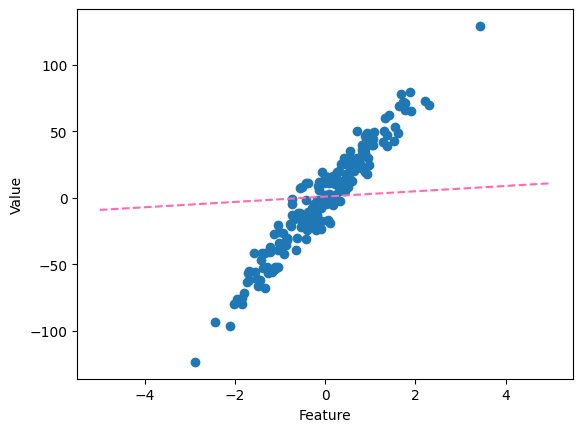

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import random

n_samples=200
X,Y=make_regression(n_samples=n_samples,n_features=1,noise=10,random_state=40)
X=X.reshape(n_samples,1)
ones=np.ones((n_samples,1))
X=np.hstack((ones,X))
#print(Y.shape)
Y=Y.reshape(n_samples,1)


plt.scatter(X[:,1],Y)
plt.xlabel("Feature")
plt.ylabel("Value")
weights=np.random.rand(2,1)
# weights[0,0]=1.0
# weights[1,0]*=10
weights[0,0]=1
weights[1,0]=2
print(weights)
xline=np.linspace(-5,5,10)
yline=weights[1]*xline+weights[0]
plt.plot(xline,yline,color="hotpink",linestyle='dashed')
plt.show()

#Splitting Dataset


In [4]:
def test_train_split(data,target,split_perc):
  perm=np.random.permutation(len(data)) #to get random permutation of 0 to len-1
  x_shuff=data[perm]    #obtain shuffled data
  y_shuff=target[perm]    #obtain shuffled targets
  #get the index till which data is in train set
  n=round((((100-split_perc)*0.01))*len(data)) #round is used to round off to the nearest integer
  x_train=x_shuff[:n] #take starting n elements of shuffled data
  y_train=y_shuff[:n]
  x_test=x_shuff[n:] #take remaining elements of shuffled data
  y_test=y_shuff[n:]
  return x_train, y_train, x_test, y_test

x_train,y_train,x_test,y_test=test_train_split(X,Y,20)

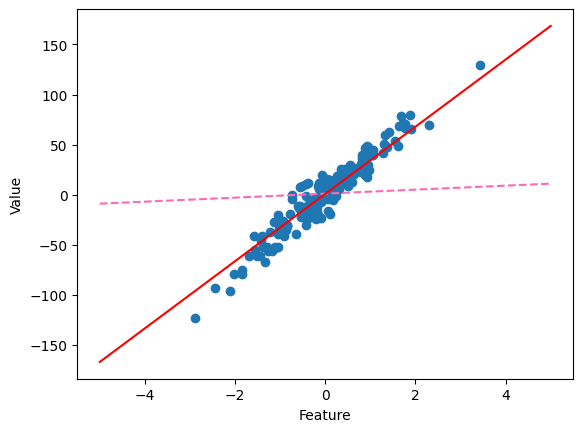

In [5]:
def graddescent(X,Y,weights,learnrate,tuning,iterations,n_samples):
    for i in range(iterations):
      # print(X)
      # print(weights)
      y_pred=X@weights
      # print(y_pred)
      loss=Y-y_pred
      val=(X.T.dot(loss))
      weights+=learnrate*val/n_samples -weights*learnrate*tuning #-weights*alpha to make sure that coefficients always decrease
    return weights


# print(weights)
w_pred=graddescent(x_train,y_train,weights,0.01,0.1,10000,n_samples)
# print(w_pred)
# print(Y)
plt.scatter(x_train[:,1],y_train)
plt.xlabel("Feature")
plt.ylabel("Value")
plt.plot(xline,yline,color="hotpink",linestyle='dashed')
x_pred=np.linspace(-5,5,10)
y_pred=w_pred[1]*x_pred+w_pred[0]
plt.plot(x_pred,y_pred,color="red")
plt.show()

# Error Metrics

In [7]:
def trainerror(X,Y,w):
  y_pred=X.dot(w)
  out=0
  for i in range(X.shape[0]):
    out+= (y_pred[i]-Y[i])**2
  return out/X.shape[0]

print(f"Training Error is :{trainerror(x_train,y_train,w_pred)}")

def testerror(x,y,w):
  y_pred=x.dot(w)
  out=0
  for i in range(x.shape[0]):
    out+= (y_pred[i]-y[i])**2
  return out/x.shape[0]

print(f"Testing Error is :{testerror(x_test,y_test,w_pred)}")

from sklearn.metrics import r2_score
r2 = r2_score(y_test, x_test.dot(w_pred))
print(f"R2 Score is :{r2}")

Training Error is :[123.65794222]
Testing Error is :[89.41907267]
R2 Score is :0.9339295294489399


#Graph of test samples


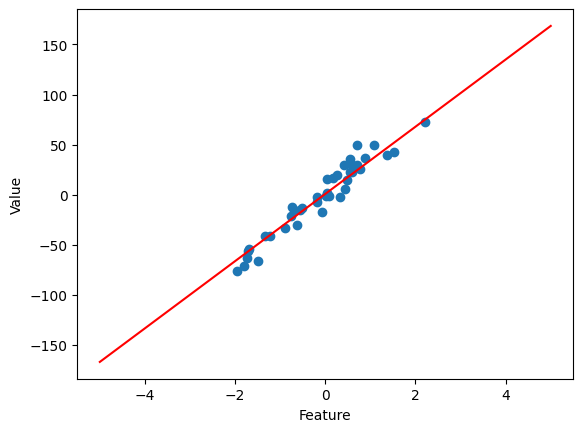

In [12]:
plt.plot(x_pred,y_pred,color="red")
plt.scatter(x_test[:,1],y_test)
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()